In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression

(100, 1)
(100, 1)


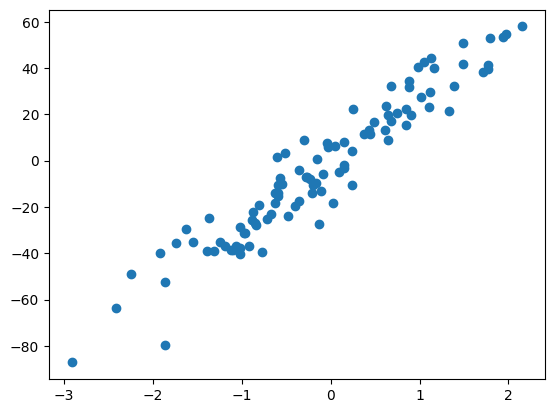

In [2]:
X, Y = make_regression(100, n_features = 1, n_targets = 1, noise = 10, random_state = 3)
Y = Y.reshape((100, 1))
print(X.shape)
print(Y.shape)
plt.scatter(X, Y)

In [3]:
import Layer

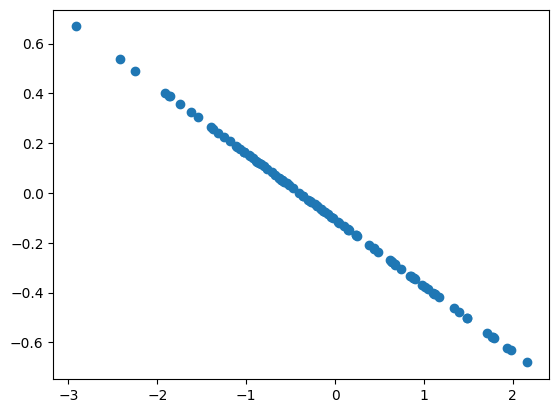

In [4]:
l1 = Layer.Linear(1, 1)
out = l1(X)
plt.scatter(X, out)

### 測試多層Linear的效果

In [5]:
l1 = Layer.Linear(1, 5)
relu1 = Layer.Relu()
l2 = Layer.Linear(5, 1)

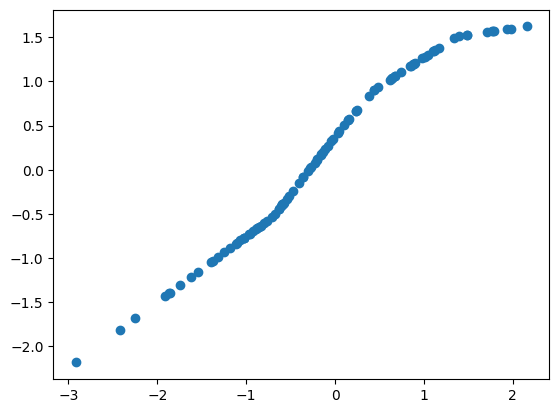

In [6]:
out = l1(X)
out = relu1(out)
out = l2(out)

plt.scatter(X, out)

In [7]:
learningRate = 0.01

### 實作反向傳播

In [8]:
def backward(dz: np.ndarray, layer, layerIn: np.ndarray) -> np.ndarray:
    # w的梯度
    gw = layerIn.T.dot(dz)
    # b的梯度
    gb = np.sum(dz, axis = 0, keepdims = True)
    new_dz = dz.dot(layer.weight.T)
    # print(gw)
    # print(gb)
    layer.weight -= learningRate * gw
    layer.bias -= learningRate * gb
    return new_dz

### 訓練

1022.747592413559
805.4443844070043
593.2102426236063
298.98371886219974
112.57329670816412
85.75979992888303
81.6402172835468
80.95303482388108
80.84187580847099
80.82421727779993
80.82142697015261
80.82098715152146
80.82091787431418
80.82090696512472
80.8209052473398
80.82090497685665
80.82090493426608
80.82090492755965
80.82090492650364
80.82090492633735
80.82090492631117
80.82090492630705
80.82090492630641
80.8209049263063
80.8209049263063
80.82090492630628
80.82090492630627
80.82090492630627
80.82090492630628
80.8209049263063
80.82090492630628
80.82090492630628
80.82090492630627
80.82090492630627
80.8209049263063
80.8209049263063
80.82090492630627
80.82090492630628
80.8209049263063
80.82090492630628
80.82090492630627
80.82090492630627
80.82090492630627
80.82090492630628
80.82090492630628
80.82090492630628
80.82090492630628
80.82090492630628
80.82090492630628
80.82090492630628


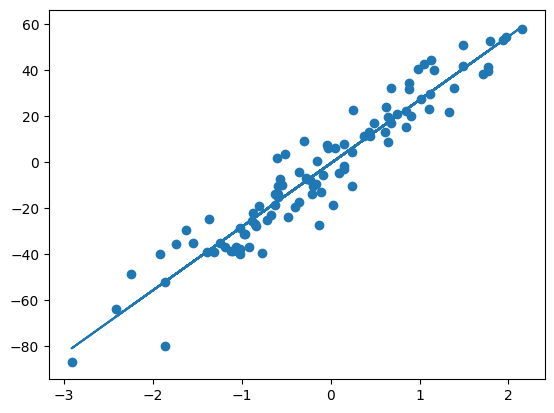

In [9]:
l1 = Layer.Linear(1, 10)
l2 = Layer.Linear(10, 1)

for i in range(50):
    # forward pass
    out1 = l1(X)
    out2 = l2(out1)
    
    # 計算誤差，用MSE
    loss = np.mean(np.square(out2 - Y))
    print(loss)
    
    # backward pass
    dz2 = 2 * (out2 - Y) / out2.shape[0] # MES的導數
    dz1 = backward(dz2, l2, out1)
    _ = backward(dz1, l1, X)
    
# 跑跑看效果
out1 = l1(X)
prediction = l2(out1)
plt.plot(X, prediction)
plt.scatter(X, Y)
plt.show()

### 加入Relu後

909.4701720731772
798.0317941451312
631.773534120189
403.63552934551035
210.94007578555275
124.02796816108996
93.5473910777243
86.99201139223207
85.92035017670904
85.42209419111316
84.90323219549835
84.50727936904474
84.06585791399208
83.69616874586687
83.37878948791462
83.11045367135826
82.86034972135369
82.61974930067204
82.35952095264462
82.08798773784814
81.84859760153635
81.62191303318441
81.39413844497301
81.09485958292747
80.77936607460752
80.44813161907133
80.15819037874574
79.89882704878357
79.65255015146529
79.41404047716266
79.14730653300727
78.92592065019599
78.74784538875652
78.52684697709773
78.37946943736328
78.27732567249127
78.18447535963529
78.10437540544667
78.03770750516613
77.97587291577629
77.92826412682152
77.89372577660896
77.86106807828669
77.83352429991918
77.80793563894657
77.78359359815619
77.7591965247823
77.73558911877356
77.713567735465
77.69184135582573


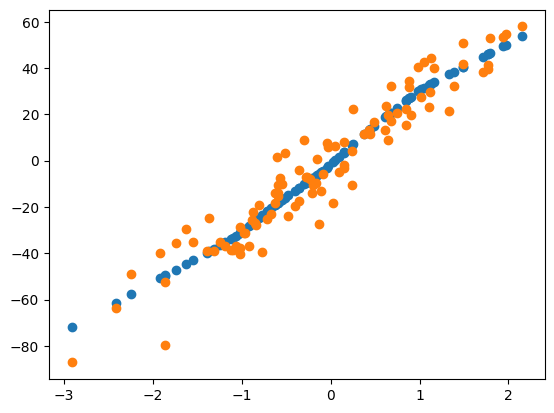

In [10]:
l1 = Layer.Linear(1, 10)
relu1 = Layer.Relu()
l2 = Layer.Linear(10, 1)

for i in range(50):
    # forward pass
    out1 = l1(X)
    a1 = relu1(out1)
    out2 = l2(a1)
    
    # 計算誤差，用MSE
    loss = np.mean(np.square(out2 - Y))
    print(loss)
    
    # backward pass
    dz2 = 2 * (out2 - Y) / out2.shape[0] # MES的導數
    dz1 = backward(dz2, l2, out1)
    dz1 *= relu1.derivative(out1)
    _ = backward(dz1, l1, X)
    
# 跑跑看效果
out1 = l1(X)
a1 = relu1(out1)
prediction = l2(a1)
plt.scatter(X, prediction)
plt.scatter(X, Y)
plt.show()